# Library Imports

In [1]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from utils.Validator import *
pd.set_option('display.max_columns', None)  
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Load Datasets

In [3]:
df_comp_tags = pd.read_csv(r"../data/CompetitionTags.csv")
df_datasets = pd.read_csv(r"../data/Datasets.csv")
df_tags = pd.read_csv(r"../data/Tags.csv")
df_teams = pd.read_csv(r"../data/Teams.csv")
df_user_organizations = pd.read_csv(r"../data/UserOrganizations.csv")
df_user = pd.read_csv(r"../data/Users.csv")

## Users

In [5]:
df_users = pd.read_csv(r"../data/Users.csv")
df_users.head()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,1,kaggleteam,Kaggle Team,03/24/2011,5
1,368,antgoldbloom,Anthony Goldbloom,01/20/2010,2
2,381,iguyon,Isabelle,01/29/2010,2
3,383,davidstephan,David Stephan,02/01/2010,0
4,384,gabewarren,Gabe Warren,02/02/2010,0


In [11]:
Validator.validar_categorico(df_users,["Id","UserName","DisplayName"])

,Variable,n,Missing,%Missing,Unico
0,Id,10063609,0,0.0,10063609
0,UserName,10063609,1,0.0,10063608
0,DisplayName,10063609,219,0.0,8496088


In [10]:
df_users[df_users["DisplayName"].isnull()].head()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
11932,13059,null13059,NaN,07/11/2011,0
15535,16853,null116853,NaN,04/04/2011,1
15704,17030,null217030,NaN,04/08/2011,0
36818,41327,yixuanq,NaN,04/28/2012,1
71276,78343,user78343,NaN,12/31/2012,0


In [43]:
df_users["RegisterDate"] = df_users["RegisterDate"].astype("datetime64")

<AxesSubplot:xlabel='RegisterDate'>

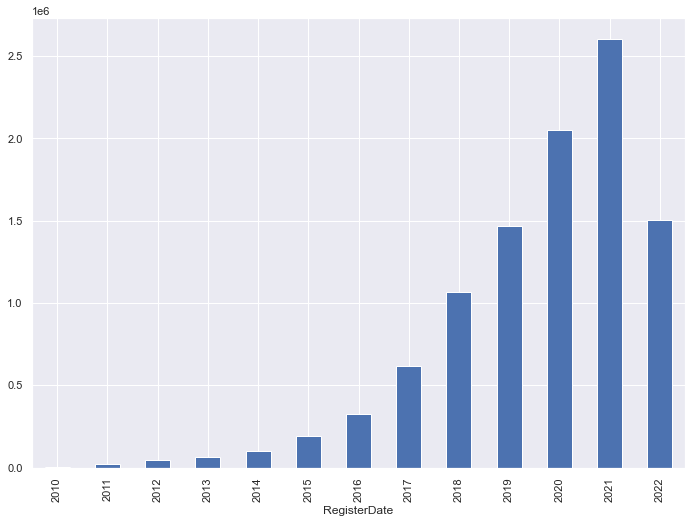

In [20]:
df_users.groupby([df_users["RegisterDate"].dt.year])["RegisterDate"].count().plot(kind="bar")

In [8]:
df_user["PerformanceTier"].value_counts()

0    9869717
1     180240
2      11154
3       2095
4        349
5         54
Name: PerformanceTier, dtype: int64

## Competitions

In [27]:
df_competitions = pd.read_csv(r"../data/Competitions.csv")

In [28]:
df_competitions.head(5)

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,ValidationSetName,ValidationSetValue,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2.0,NaN,1,NaN,04/07/2010 07:57:43,05/25/2010 18:00:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.0,AE,Absolute Error,Total sum of absolute value of each individual...,False,NaN,NaN,5,5,20,False,False,False,False,USD,1000.0,1,1.0,False,22,25,22
1,2435,hivprogression,Predict HIV Progression,This contest requires competitors to predict t...,Featured,1.0,NaN,1,NaN,04/27/2010 21:29:09,08/02/2010 12:32:00,NaN,NaN,NaN,NaN,True,True,False,True,30,0.0,MCE,Mean Consequential Error,Averages consequential error (i.e. if predicti...,True,Boolean,"{0, 1}",4,4,20,False,False,False,False,USD,500.0,1,1.0,True,107,116,855
2,2438,worldcup2010,World Cup 2010 - Take on the Quants,Quants at Goldman Sachs and JP Morgan have mod...,Featured,NaN,NaN,1,NaN,06/03/2010 08:08:08,06/11/2010 13:29:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.0,Custom,Custom Evaluation Metric,A placeholder that indicates a custom algorith...,False,NaN,NaN,5,5,20,False,False,False,False,USD,100.0,1,0.5,False,0,0,0
3,2439,informs2010,INFORMS Data Mining Contest 2010,The goal of this contest is to predict short t...,Featured,4.0,NaN,1,NaN,06/21/2010 21:53:25,10/10/2010 02:28:00,NaN,NaN,NaN,NaN,True,True,False,True,10,0.0,AUC,Area Under Receiver Operating Characteristic C...,Measures discrimination. Calculates how well a...,True,A real number,"(-Infinity, Infinity)",5,5,20,False,False,False,False,USD,0.0,1,1.0,True,145,153,1483
4,2442,worldcupconf,World Cup 2010 - Confidence Challenge,The Confidence Challenge requires competitors ...,Featured,3.0,NaN,1,NaN,06/03/2010 08:08:08,06/11/2010 13:28:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.0,Custom,Custom Evaluation Metric,A placeholder that indicates a custom algorith...,False,NaN,NaN,5,5,20,False,False,False,False,USD,100.0,1,0.5,False,63,64,63


In [29]:
df_competitions = df_competitions[["Id","Title","OrganizationId","CompetitionTypeId","EnabledDate","RewardType","TotalTeams","EvaluationAlgorithmAbbreviation","RewardQuantity"]]
df_competitions.head()

,Id,Title,OrganizationId,CompetitionTypeId,EnabledDate,RewardType,TotalTeams,EvaluationAlgorithmAbbreviation,RewardQuantity
0,2408,Forecast Eurovision Voting,NaN,1,04/07/2010 07:57:43,USD,22,AE,1000.0
1,2435,Predict HIV Progression,NaN,1,04/27/2010 21:29:09,USD,107,MCE,500.0
2,2438,World Cup 2010 - Take on the Quants,NaN,1,06/03/2010 08:08:08,USD,0,Custom,100.0
3,2439,INFORMS Data Mining Contest 2010,NaN,1,06/21/2010 21:53:25,USD,145,AUC,0.0
4,2442,World Cup 2010 - Confidence Challenge,NaN,1,06/03/2010 08:08:08,USD,63,Custom,100.0


In [35]:
Validator.validar_numerico(df_competitions,["TotalTeams","RewardQuantity"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,TotalTeams,5484,0,0.0,0,0.0,584,110.43,0.0,8751.0,97.00,1391.20,11.5,40.0,150.0,527.85,2120.51,716,13.06,112,2.04,547,9.97,275,5.01,55,1.00
0,RewardQuantity,5484,4190,76.4,0,0.0,63,11926.88,0.0,1500000.0,1093.75,226086.33,0.0,437.5,25000.0,50000.00,150700.00,291,5.31,7,0.13,102,1.86,54,0.98,13,0.24


In [31]:
Validator.validar_categorico(df_competitions,["Id","Title","OrganizationId","CompetitionTypeId","RewardType","EvaluationAlgorithmAbbreviation","RewardQuantity"])

,Variable,n,Missing,%Missing,Unico
0,Id,5484,0,0.00,5484
0,Title,5484,0,0.00,5107
0,OrganizationId,5484,5108,93.14,140
0,CompetitionTypeId,5484,0,0.00,2
0,RewardType,5484,4686,85.45,7
0,EvaluationAlgorithmAbbreviation,5484,1,0.02,138
0,RewardQuantity,5484,4190,76.40,63


In [33]:
df_competitions["EvaluationAlgorithmAbbreviation"].value_counts()

CategorizationAccuracy              1943
RMSE                                 987
AUC                                  660
MeanFScore                           352
MAE                                  253
                                    ... 
SantaWorkshopSchedule2019Revenge       1
lux_ai_2021                            1
IndoorLocalization                     1
FacebookCircles                        1
NFLHelmetIdentification                1
Name: EvaluationAlgorithmAbbreviation, Length: 138, dtype: int64

In [34]:
df_competitions["CompetitionTypeId"].value_counts()

1    5483
2       1
Name: CompetitionTypeId, dtype: int64

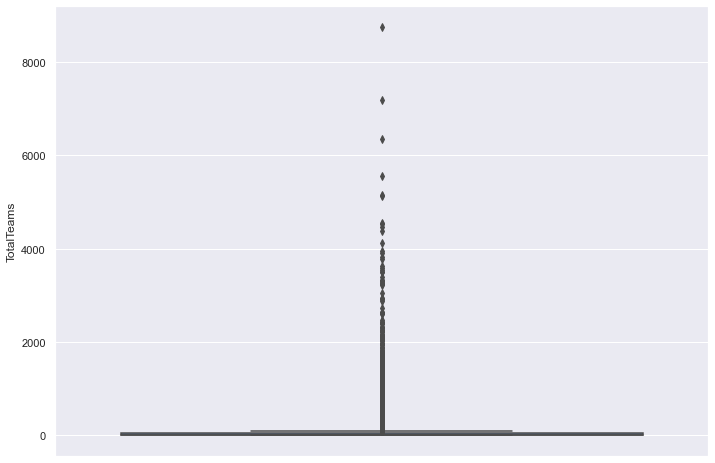

In [36]:
sns.boxplot( y='TotalTeams', data=df_competitions)
plt.show()

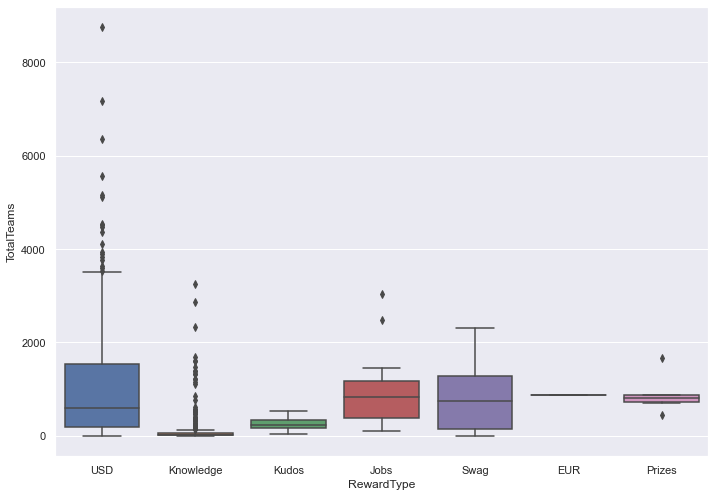

In [37]:
sns.boxplot(x="RewardType", y='TotalTeams', data=df_competitions)
plt.show()

## User Followers

In [39]:
df_user_followers = pd.read_csv(r"../data/UserFollowers.csv")
df_user_followers.head()

,Id,UserId,FollowingUserId,CreationDate
0,64,368,993,05/23/2017
1,122289,368,67483,08/07/2018
2,323230,368,1663522,09/18/2019
3,412502,368,1302389,03/08/2020
4,447841,368,391404,04/27/2020


<AxesSubplot:xlabel='CreationDate'>

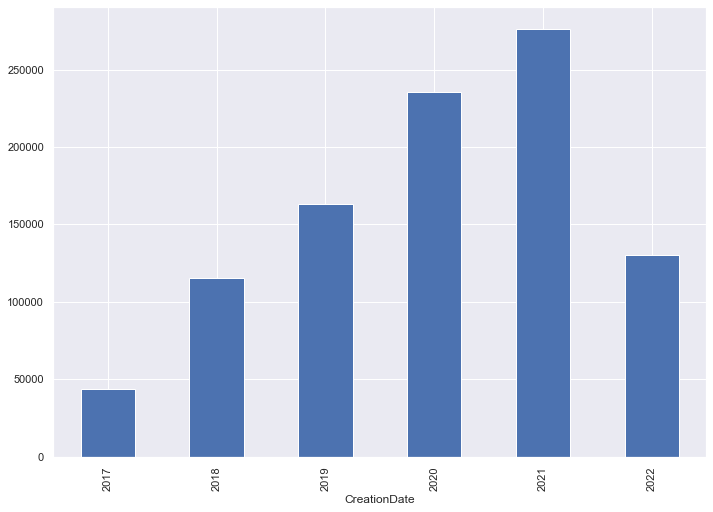

In [44]:
df_user_followers["CreationDate"] = df_user_followers["CreationDate"].astype("datetime64")
df_user_followers.groupby([df_user_followers["CreationDate"].dt.year])["CreationDate"].count().plot(kind="bar")

In [41]:
Validator.validar_categorico(df_user_followers,["Id","UserId","FollowingUserId"])

,Variable,n,Missing,%Missing,Unico
0,Id,964561,0,0.0,964561
0,UserId,964561,0,0.0,308338
0,FollowingUserId,964561,0,0.0,156525


In [42]:
df_user_followers[["UserId","FollowingUserId"]].duplicated().sum()

0

## Team Memberships

In [46]:
df_team_member = pd.read_csv(r"../data/TeamMemberships.csv")
df_team_member.head()

,Id,TeamId,UserId,RequestDate
0,16458,518,635,NaN
1,16464,526,839,NaN
2,16465,527,816,NaN
3,16466,528,778,NaN
4,16467,529,747,NaN


In [47]:
Validator.validar_categorico(df_team_member, ['TeamId', 'UserId'])

,Variable,n,Missing,%Missing,Unico
0,TeamId,5472933,0,0.0,5322322
0,UserId,5472933,0,0.0,1969431


## Tags

In [4]:
df_tags = pd.read_csv(r"../data/Tags.csv")
df_tags.head()

,Id,ParentTagId,Name,Slug,FullPath,Description,DatasetCount,CompetitionCount,KernelCount
0,1115,12116.0,websites,web-sites,subject > science and technology > internet > ...,"Websites, like this one, are collections of co...",211,0,186
1,1219,12000.0,research,research,subject > science and technology > research,Research is our endeavor to systematically inc...,340,6,249
2,1220,12116.0,search engines,search-engines,subject > science and technology > internet > ...,NaN,56,0,69
3,1222,11105.0,universities and colleges,universities-and-colleges,subject > people and society > education > uni...,This tag contains all kinds of information abo...,3446,0,383
4,2100,16637.0,culture and humanities,culture-and-humanities,subject > culture and humanities,What is it to be human? What activities and pa...,173,0,62


In [5]:
df_tags = df_tags[["Id","ParentTagId","Name"]]
df_tags.head()

,Id,ParentTagId,Name
0,1115,12116.0,websites
1,1219,12000.0,research
2,1220,12116.0,search engines
3,1222,11105.0,universities and colleges
4,2100,16637.0,culture and humanities


In [7]:
Validator.validar_categorico(df_tags, ["Id","ParentTagId","Name"])

,Variable,n,Missing,%Missing,Unico
0,Id,320,0,0.00,320
0,ParentTagId,320,7,2.19,60
0,Name,320,0,0.00,320
